In [142]:
import prophet as Prophet
from prophet.plot import add_changepoints_to_plot

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [320]:
df = pd.read_csv('../data/mf_df_updated.csv')

In [321]:
df.head()

,Season,Duke_Win,Duke_Loss,Duke_Overall_Win_Loss,Duke_Ranking,Opponent_Ranking,Attendance,Class_Or_Holiday,tempmax,tempmin,...,Opponent_NCCU,Opponent_NorthCarolina,Opponent_Northwestern,Opponent_Pittsburgh,Opponent_Virginia,Opponent_VirginiaTech,Opponent_WakeForest,weather_partly_cloudy_day,weather_rain,Event_Type_Regular
0,2016,0,0,-1.000,-1,-1,35049,0,78.80,63.86,...,True,False,False,False,False,False,False,False,True,True
1,2016,1,1,0.500,-1,-1,21077,0,91.40,73.22,...,False,False,False,False,False,False,True,True,False,False
2,2016,2,3,0.400,-1,-1,25201,0,82.58,65.48,...,False,False,False,False,True,False,False,False,True,False
3,2016,3,3,0.500,-1,-1,20613,0,70.70,63.68,...,False,False,False,False,False,False,False,False,True,True
4,2016,3,5,0.375,-1,7,38217,0,64.76,38.12,...,False,False,False,False,False,True,False,False,False,False


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season                     38 non-null     int64  
 1   Duke_Win                   38 non-null     int64  
 2   Duke_Loss                  38 non-null     int64  
 3   Duke_Overall_Win_Loss      38 non-null     float64
 4   Duke_Ranking               38 non-null     int64  
 5   Opponent_Ranking           38 non-null     int64  
 6   Attendance                 38 non-null     int64  
 7   Class_Or_Holiday           38 non-null     int64  
 8   tempmax                    38 non-null     float64
 9   tempmin                    38 non-null     float64
 10  tempavg                    38 non-null     float64
 11  feelslikemax               38 non-null     float64
 12  feelslikemin               38 non-null     float64
 13  feelslikeavg               38 non-null     float64
 

In [323]:
df["ds"] = pd.to_datetime(df["Game_Date"])
df["y"] = df["Attendance"]

In [324]:
df_02 = df[["ds"
            ,"y"
            ,"Opponent_Army"
            ,"Opponent_GeorgiaTech"
            ,"Opponent_Miami"
            ,"Opponent_NCA_T"
            ,"Opponent_NCCU"
            ,"Opponent_NorthCarolina"
            ,"Opponent_Northwestern"
            ,"Opponent_Pittsburgh"
            ,"Opponent_Virginia"
            ,"Opponent_VirginiaTech"
            ,"Opponent_WakeForest"
            ,"weather_partly_cloudy_day"
            ,"weather_rain"
            ,"tempavg"
            ,"windspeed"
            ,"Game_Time"
            ,"Event_Type_Regular"
            ]]

# Additive

11:32:17 - cmdstanpy - INFO - Chain [1] start processing
11:32:17 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\JaredBailey\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\JaredBailey\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


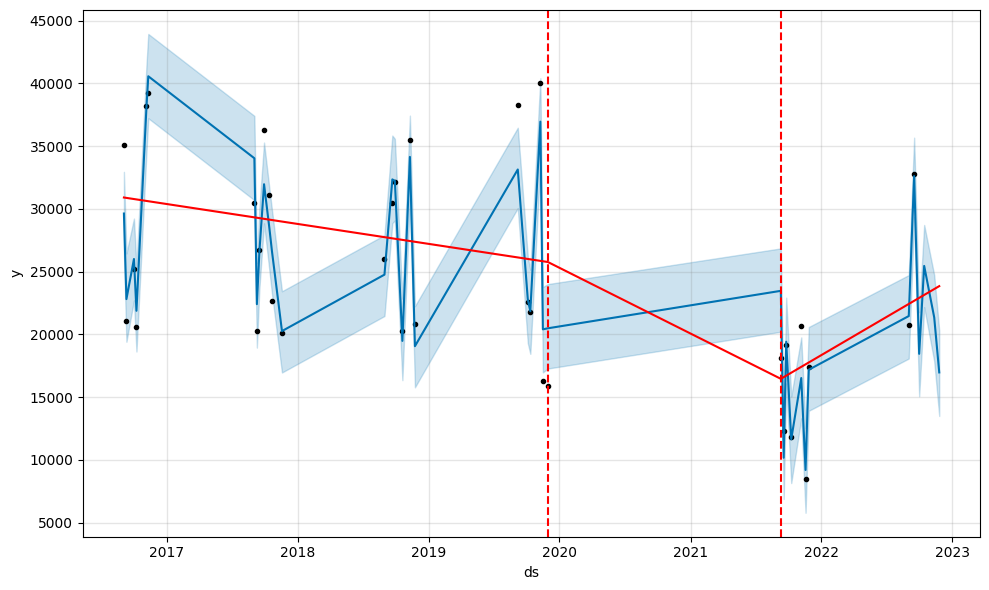

In [318]:
changepoints = [
                # '2019-11-16',
                '2019-11-30',
                '2021-09-10' # First year after covid
                # '2021-09-18'
                # '2021-11-27'
                ]

model = Prophet.Prophet(
    seasonality_mode="additive",
    growth="linear",
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_prior_scale=.02,
    changepoint_prior_scale=10,
    changepoints=changepoints
)

model.add_regressor("Opponent_Army")
model.add_regressor("Opponent_GeorgiaTech")
model.add_regressor("Opponent_Miami")
model.add_regressor("Opponent_NCA_T")
model.add_regressor("Opponent_NCCU")
model.add_regressor("Opponent_NorthCarolina")
model.add_regressor("Opponent_Northwestern")
model.add_regressor("Opponent_Pittsburgh")
model.add_regressor("Opponent_Virginia")
model.add_regressor("Opponent_VirginiaTech")
model.add_regressor("Opponent_WakeForest")
model.add_regressor("weather_partly_cloudy_day")
model.add_regressor("weather_rain")
model.add_regressor("tempavg")
model.add_regressor("windspeed")
model.add_regressor("Game_Time")

train = df_02[df_02["ds"] < "2022-09-30"]

model.fit(train)

future = model.make_future_dataframe(periods=365)

# # only keep future dates that are in 
# 9/3/2016 9/10/2016 10/1/2016 10/8/2016 11/5/2016 11/10/2016
# 9/2/2017 9/9/2017 9/16/2017 9/29/2017 10/14/2017 10/21/2017 11/18/2017
# 8/31/2018 9/22/2018 9/29/2018 10/20/2018 11/10/2018 11/24/2018
# 9/7/2019 10/5/2019 10/12/2019 11/9/2019 11/16/2019 11/30/2019
# 9/10/2021 9/18/2021 9/25/2021 10/9/2021 11/6/2021 11/18/2021 11/27/2021
# 9/2/2022 9/17/2022 10/1/2022 10/15/2022 11/12/2022 11/26/2022
future = future[future["ds"].isin(pd.to_datetime([
"2016-09-03","2016-09-10","2016-10-01","2016-10-08","2016-11-05","2016-11-10"
,"2017-09-02","2017-09-09","2017-09-16","2017-09-29","2017-10-14","2017-10-21","2017-11-18"
,"2018-08-31","2018-09-22","2018-09-29","2018-10-20","2018-11-10","2018-11-24"
,"2019-09-07","2019-10-05","2019-10-12","2019-11-09","2019-11-16","2019-11-30"
,"2021-09-10","2021-09-18","2021-09-25","2021-10-09","2021-11-06","2021-11-18","2021-11-27"
,"2022-09-02","2022-09-17","2022-10-01","2022-10-15","2022-11-12","2022-11-26"
]))]

future = future.reset_index(drop=True)

future["Opponent_Army"] = df_02["Opponent_Army"]
future["Opponent_GeorgiaTech"] = df_02["Opponent_GeorgiaTech"]
future["Opponent_Miami"] = df_02["Opponent_Miami"]
future["Opponent_NCA_T"] = df_02["Opponent_NCA_T"]
future["Opponent_NCCU"] = df_02["Opponent_NCCU"]
future["Opponent_NorthCarolina"] = df_02["Opponent_NorthCarolina"]
future["Opponent_Northwestern"] = df_02["Opponent_Northwestern"]
future["Opponent_Pittsburgh"] = df_02["Opponent_Pittsburgh"]
future["Opponent_Virginia"] = df_02["Opponent_Virginia"]
future["Opponent_VirginiaTech"] = df_02["Opponent_VirginiaTech"]
future["Opponent_WakeForest"] = df_02["Opponent_WakeForest"]
future["weather_partly_cloudy_day"] = df_02["weather_partly_cloudy_day"]
future["weather_rain"] = df_02["weather_rain"]
future["tempavg"] = df_02["tempavg"]
future["windspeed"] = df_02["windspeed"]
future["Game_Time"] = df_02["Game_Time"]



# future.tail(7)


forecast = model.predict(future)

fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

In [319]:
forecast.tail(6)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Game_Time,Game_Time_lower,Game_Time_upper,Opponent_Army,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
32,2022-09-02,22419.331977,18069.241311,24722.221388,22419.331977,22419.331977,953.623416,953.623416,953.623416,0.0,...,1357.458195,1357.458195,1357.458195,-55.088433,-55.088433,-55.088433,0.0,0.0,0.0,21455.196154
33,2022-09-17,22669.997313,29331.972807,35673.125875,22669.997313,22669.997313,612.878428,612.878428,612.878428,0.0,...,1491.625575,1491.625575,1491.625575,-1484.102716,-1484.102716,-1484.102716,0.0,0.0,0.0,32610.900970
34,2022-10-01,22903.951626,15061.420489,21763.374350,22903.951626,22903.951626,953.623416,953.623416,953.623416,0.0,...,-3170.690872,-3170.690872,-3170.690872,3170.478606,3170.478606,3170.478606,0.0,0.0,0.0,18445.054705
35,2022-10-15,23137.905940,22162.533501,28715.455637,23137.905940,23137.905940,1137.101487,1137.101487,1137.101487,0.0,...,-2130.893679,-2130.893679,-2130.893679,-1422.433295,-1422.433295,-1422.433295,0.0,0.0,0.0,25451.056407
36,2022-11-12,23605.814568,17860.053064,24724.737951,23605.814568,23605.814568,-959.790746,-959.790746,-959.790746,0.0,...,-1728.391539,-1728.391539,-1728.391539,3531.774410,3531.774410,3531.774410,0.0,0.0,0.0,21347.532472
37,2022-11-26,23839.768881,13490.714493,20300.808189,23839.768881,23839.768881,-94.822700,-94.822700,-94.822700,0.0,...,1592.251110,1592.251110,1592.251110,-5658.696462,-5658.696462,-5658.696462,0.0,0.0,0.0,16963.508636
